### Assignment 3

Prog 8510 : Programming Statistics for Business

* Student Name : Sai Upendra M
* Student ID : 8797514

**Instructions** : 

- import relevant python libraries to construct and evaluate ML models (sklearn and dmba etc.). 
- Load the new_cars_for_assignment.csv dataset from Econestoga given along with this question file and answer the questions below.
    



import the dataset and packages in the cell below

In [1]:
import sklearn
! pip install dmba
import dmba
import pandas as pd
df = pd.read_csv('C:/Users/saiup/Downloads/new_cars_for_assignment.csv')
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration origin  \
0  18.0          8         307.0         130    3504          12.0    usa   
1  15.0          8         350.0         165    3693          11.5    usa   
2  18.0          8         318.0         150    3436          11.0    usa   
3  16.0          8         304.0         150    3433          12.0    usa   
4  17.0          8         302.0         140    3449          10.5    usa   

                          me  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino  


#### 1. Split the datasets into training and testing data with training data ratio set to 75%

In [2]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)
print("Training data shape: ", train_data.shape)
print("Testing data shape: ", test_data.shape)

Training data shape:  (298, 8)
Testing data shape:  (100, 8)


#### 2. Build a Machine Learning linear regression model using the training data in order to predict the mpg of a car given all the other numerical variables (cylinders	displacement	horsepower	weight	acceleration)


In [3]:
from sklearn.linear_model import LinearRegression
X = train_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y = train_data['mpg']
linear_model = LinearRegression()
linear_model.fit(X, y)
print("Coefficients:", linear_model.coef_)

Coefficients: [-0.02722184 -0.0112054  -0.04718446 -0.00484868 -0.08172585]


#### 3. On the test dataset (remaining 25% not used in the training) use the trained model from part 2 to predict the values of test data (X_test ) and create a new column in the test dataset title "Predicted MPG Values" 


In [4]:
X_test = test_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y_pred = linear_model.predict(X_test)
test_data['Predicted MPG Values'] = y_pred

#### 4. Using the test data plot the actual mpg values and the predicted mpg values together. Comment on any insights you see from this visual.


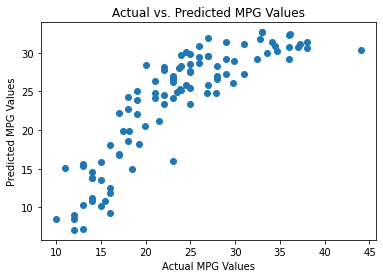

In [5]:
import matplotlib.pyplot as plt
plt.scatter(test_data['mpg'], test_data['Predicted MPG Values'])
plt.xlabel('Actual MPG Values')
plt.ylabel('Predicted MPG Values')
plt.title('Actual vs. Predicted MPG Values')
plt.show()

#### 5.  Evaluate the performance of your model using the test dataset and comment on its accuracy metric RMSE. What does the value of this RMSE tells us here ?

In [6]:
y_test = test_data['mpg']


In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

In [8]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.9457320318685705


-------------------------------
## Classification
-----------------------------

#### 6. Use the training set from part 1 to create a classification model using decision tree classifier to predict whether the mpg of a car is going to be more than 25 or not given the values of the predictor variables. You will use mpg column as the target variable and all the other numerical variables as predictors for this part. 

Hint : your model **should not predict the mpg of the car but simply 1 (True) or 0 (False) meaning whether the mpg of the given car would be more than 25 or not respectively**. This is a classification problem and not a regression one hence please modify the target variable accordingly before moving forward.

In [9]:
df['mpg_25'] = (df['mpg'] > 25).astype(int)

In [10]:
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)
X_train = train_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y_train = train_data['mpg_25']

In [11]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 7. Using your classfication model from the previous part  predict whether a car with the following charactaeristics will have higher than 25 mpg or not

- weight = 2700
- cylinders = 4
- displacement = 455
- horsepower = 225
- acceleration = 15.5



In [12]:
new_data = np.array([[4, 455, 225, 2700, 15.5]])

In [13]:
prediction = dt_model.predict(new_data)

C:\Users\saiup\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [14]:
if prediction == 0:
    print("Less than or equal to 25 mpg")
else:
    print("More than 25 mpg")

More than 25 mpg
